# 19강
- Gradient Vanishing Problem

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

import os
import json
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.metrics import Mean, SparseCategoricalAccuracy

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

(10, 28, 28, 1) (10,)
<class 'list'>
14
<class 'tensorflow.python.framework.ops.EagerTensor'>
(784, 10)
(784, 10)


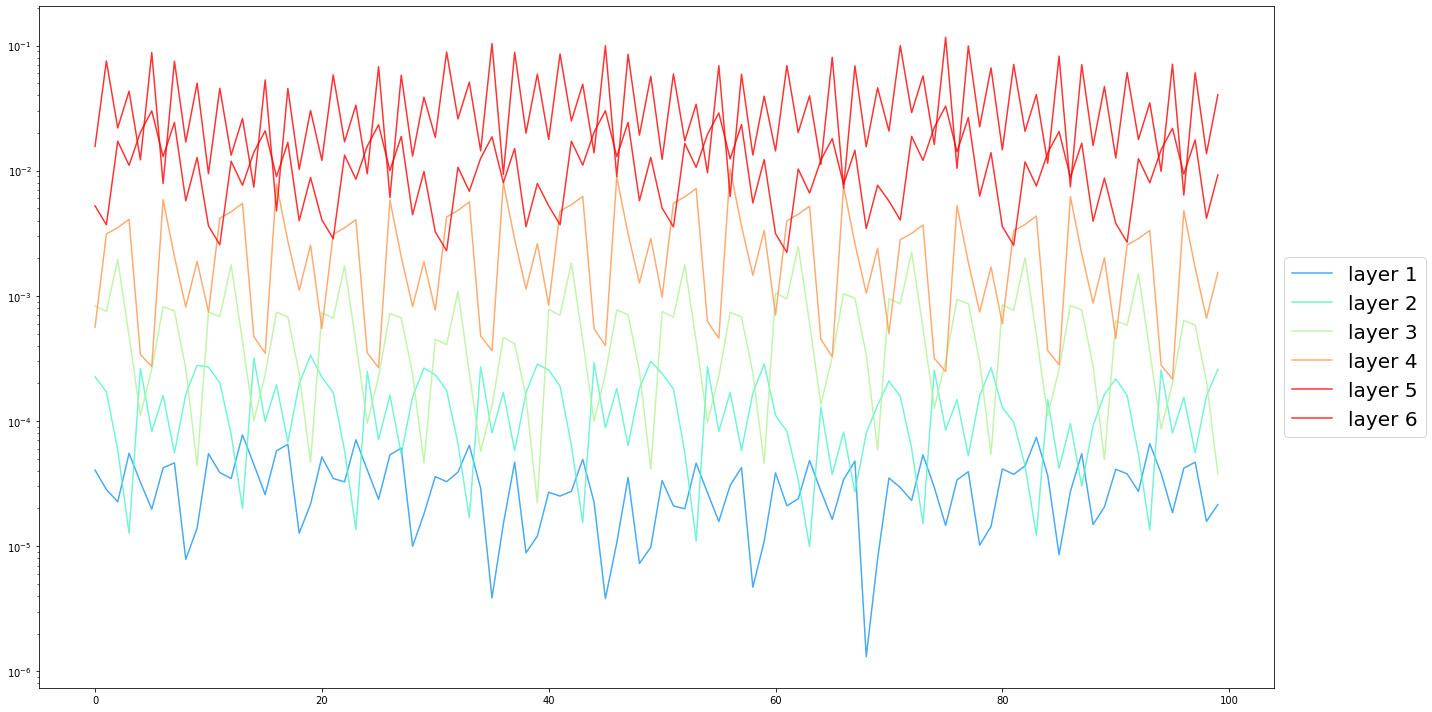

In [24]:
train_ds, ds_info = tfds.load(name = 'mnist',
                              shuffle_files = True,
                              as_supervised = True,
                              split = 'train',
                              with_info = True)

def normalization(images, labels):
  images = tf.cast(images, tf.float32) / 255.
  return [images, labels]

n_layer = 7
cmap = cm.get_cmap('rainbow', lut = n_layer-1)
units = [10]*n_layer

model = Sequential()
model.add(Flatten())
for layer_idx in range(n_layer - 1):
  model.add(Dense(units = units[layer_idx], activation = 'sigmoid'))
model.add(Dense(units=10, activation='softmax'))

model.build(input_shape = (None, 28, 28, 1))
# model.summary()

train_batch_size = 10
train_ds = train_ds.map(normalization).batch(train_batch_size)

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD()

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.shape, labels.shape)

with tf.GradientTape() as tape:
  predictions = model(images)
  loss = loss_object(labels, predictions)

gradients = tape.gradient(loss, model.trainable_variables)

print(type(gradients))
print(len(gradients))
print(type(gradients[0]))
print(gradients[0].shape)
print(model.layers[1].get_weights()[0].shape)

fig, ax = plt.subplots(figsize = (20, 10))
ax.set_yscale('log')

for grad_idx, grad in enumerate(gradients[::2]):
  if grad_idx >= 1:
    grad_abs = np.abs(grad.numpy().flat)
    ax.plot(grad_abs,
            label = 'layer {}'.format(grad_idx),
            color = cmap(grad_idx),
            alpha = 0.8)

ax.legend(bbox_to_anchor=(1, 0.5),
          loc = 'center left',
          fontsize = 20)

fig.tight_layout()

# gradient bannishing, 
# 점점 gradient의 절대값이 적어지는 문제 발생!
# (layer1의 gradient가 거의 0에 수렴) -> layer의 라미터 업데이트가 일어나지 않음

(10, 28, 28, 1) (10,)
<class 'list'>
14
<class 'tensorflow.python.framework.ops.EagerTensor'>
(784, 10)
(784, 10)


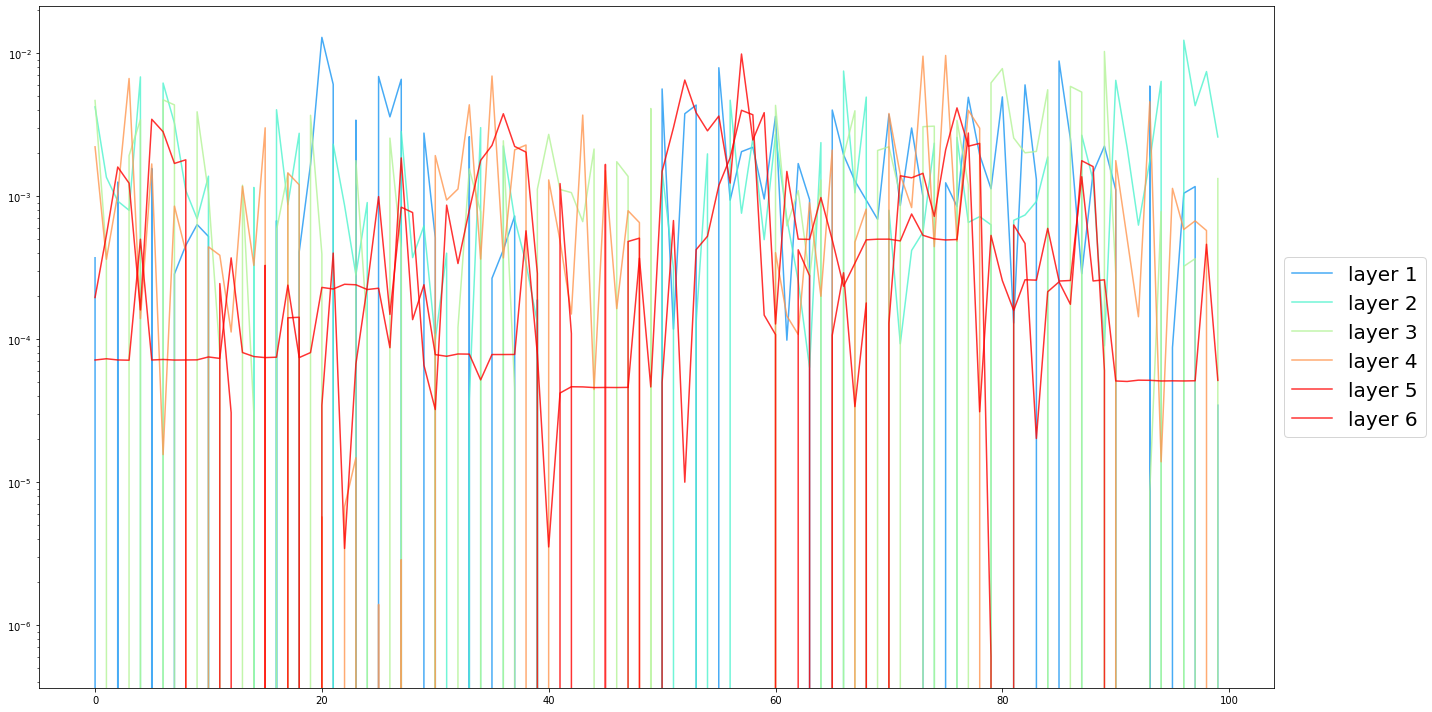

In [25]:
train_ds, ds_info = tfds.load(name = 'mnist',
                              shuffle_files = True,
                              as_supervised = True,
                              split = 'train',
                              with_info = True)

def normalization(images, labels):
  images = tf.cast(images, tf.float32) / 255.
  return [images, labels]

n_layer = 7
cmap = cm.get_cmap('rainbow', lut = n_layer-1)
units = [10]*n_layer

model = Sequential()
model.add(Flatten())
for layer_idx in range(n_layer - 1):
  model.add(Dense(units = units[layer_idx], activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

model.build(input_shape = (None, 28, 28, 1))
# model.summary()

train_batch_size = 10
train_ds = train_ds.map(normalization).batch(train_batch_size)

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD()

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.shape, labels.shape)

with tf.GradientTape() as tape:
  predictions = model(images)
  loss = loss_object(labels, predictions)

gradients = tape.gradient(loss, model.trainable_variables)

print(type(gradients))
print(len(gradients))
print(type(gradients[0]))
print(gradients[0].shape)
print(model.layers[1].get_weights()[0].shape)

fig, ax = plt.subplots(figsize = (20, 10))
ax.set_yscale('log')

for grad_idx, grad in enumerate(gradients[::2]):
  if grad_idx >= 1:
    grad_abs = np.abs(grad.numpy().flat)
    ax.plot(grad_abs,
            label = 'layer {}'.format(grad_idx),
            color = cmap(grad_idx),
            alpha = 0.8)

ax.legend(bbox_to_anchor=(1, 0.5),
          loc = 'center left',
          fontsize = 20)

fig.tight_layout()

# gradient bannishing, 
# 점점 gradient의 절대값이 적어지는 문제 발생!
# (layer1의 gradient가 거의 0에 수렴) -> layer의 파라미터 업데이트가 일어나지 않음